# XGBoost Model

In [21]:
!which python

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/bin/python


In [22]:
import pandas as pd
import xgboost as xgb
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import os
import numpy as np
import matplotlib.pyplot as plt

In [23]:
import sklearn
print("scikit-learn version:", sklearn.__version__)

scikit-learn version: 1.5.2


In [24]:
def format_best_xgb_model(best_params):
    fixed_args = {
        "objective": "'multi:softprob'",
        "num_class": 3,
        "eval_metric": "'mlogloss'",
        "random_state": 42
    }

    print("model_xgb = xgb.XGBClassifier(")

    # Print fixed args
    for k, v in fixed_args.items():
        print(f"    {k}={v},")

    # Print best parameters
    for k, v in best_params.items():
        if isinstance(v, str):
            print(f"    {k}='{v}',")
        else:
            print(f"    {k}={v},")

    print(")")


## Load data

In [35]:
X_train = pd.read_csv('../Data/FINAL_SPLIT/Football-Training-2010_2025_LABELENC_train.csv')
X_test  = pd.read_csv('../Data/FINAL_SPLIT/Football-Training-2010_2025_LABELENC_test.csv')

y_train = pd.read_csv('../Data/FINAL_SPLIT/PL_dataset_2010-2025_train.csv')['MatchResult']
y_test  = pd.read_csv('../Data/FINAL_SPLIT/PL_dataset_2010-2025_test.csv')['MatchResult']

In [36]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

print(X_train.shape, X_test.shape)

(2687, 30) (933, 30)


## Train Model

In [ ]:
model_xgb = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42,
    colsample_bytree=0.9,
    gamma=0.3,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=3,
    n_estimators=75,
    subsample=0.8,
)

In [42]:
_ =model_xgb.fit(X_train, y_train)

In [43]:
y_pred = model_xgb.predict(X_test)

In [44]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:  0.609860664523044
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.84      0.72       418
           1       0.35      0.07      0.12       216
           2       0.61      0.68      0.64       299

    accuracy                           0.61       933
   macro avg       0.53      0.53      0.49       933
weighted avg       0.56      0.61      0.56       933

Confusion Matrix:
 [[351  17  50]
 [122  16  78]
 [ 84  13 202]]


In [32]:
# Testing for overfitting
train_preds = model_xgb.predict(X_train)
test_preds = model_xgb.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")

Training Accuracy: 0.6731
Testing Accuracy:  0.6355


## Using Grid Search CV to tune params

In [ ]:
param_grid = {
    "n_estimators": [25,50,75,100],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 0.9],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.3]
}

xgb_model = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

In [34]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 972 candidates, totalling 4860 fits


/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=50, subsample=0.8; total time=

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=75, subsample=0.8; total time=

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8; total tim

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8; total time=

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:43] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8; total ti

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=25, subsample=0.8; total time

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8; total ti

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=100, subsample=0.8; total time

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=25, subsample=0.8; total time=

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:44] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=75, subsample=0.8; total tim

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=75, subsample=0.8; total time

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total ti

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=75, subsample=0.8; total tim

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:45] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=75, subsample=0.8; total ti

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=1, n_estimators=100, subsample=0.8; total tim

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total tim

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8; total time

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:46] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0.8; total time=

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=75, subsample=0.8; total time

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=100, subsample=0.8; total t

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=  

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=25, subsample=0.8; total time= 

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:47] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:48] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:48] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:48] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.1

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:48] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:48] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:48] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:48] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:48] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:48] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.2s

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:48] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:48] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:48] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.2

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:49] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=75, subsample=0.8; total tim

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; to

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=75, subsample=0

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:50] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=75, subsample

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=75, subsample=0.

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=75, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=8, min_child_weight=1, n_estimators=50, subsample=0

/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/poomk/anaconda3/envs/FYP_ML_lower_SKL/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:34:51] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.01, max_depth=8, min_child_weight=3, n_estimators=25, subsample=0.8; total time=   0.1s


KeyboardInterrupt: 

In [ ]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print(format_best_xgb_model(grid_search.best_params_))

Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
model_xgb = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss',
    random_state=42,
    colsample_bytree=0.6,
    gamma=0.3,
    learning_rate=0.1,
    max_depth=4,
    min_child_weight=1,
    n_estimators=100,
    subsample=0.8,
)
None


In [ ]:
y_pred_best = best_model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Accuracy:  0.6283687943262412
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.82      0.74       316
           1       0.33      0.10      0.15       163
           2       0.61      0.74      0.67       226

    accuracy                           0.63       705
   macro avg       0.54      0.55      0.52       705
weighted avg       0.58      0.63      0.58       705

Confusion Matrix:
 [[259  20  37]
 [ 76  16  71]
 [ 46  12 168]]


In [ ]:
# Testing for overfitting
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")

Training Accuracy: 0.7660
Testing Accuracy:  0.6284


## Test Best Model

In [ ]:
model_to_save = model_xgb

with open("saved_models_result/xgboost_model.pkl", "wb") as f:
    pickle.dump(model_to_save, f)

In [ ]:
y_pred = model_xgb.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["Home Win", "Draw", "Away Win"]))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Testing for overfitting
train_preds = model_xgb.predict(X_train)
test_preds = model_xgb.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy:  {test_acc:.4f}")

Accuracy:  0.6354609929078014
Classification Report:
               precision    recall  f1-score   support

    Home Win       0.67      0.85      0.75       316
        Draw       0.25      0.04      0.06       163
    Away Win       0.62      0.77      0.69       226

    accuracy                           0.64       705
   macro avg       0.51      0.55      0.50       705
weighted avg       0.56      0.64      0.57       705

Confusion Matrix:
 [[269  12  35]
 [ 87   6  70]
 [ 47   6 173]]
Training Accuracy: 0.6731
Testing Accuracy:  0.6355


### Testing individual match cases

In [ ]:
label_map = {0: "Home Win", 1: "Draw", 2: "Away Win"}

# Ensure predictions exist
y_pred = model_xgb.predict(X_test)
y_probs = model_xgb.predict_proba(X_test)

# Restore original indices to match metadata
test_indices = X_test.index
df_test = df_all.loc[test_indices].copy()

# Add prediction info
df_test["TrueResult"] = y_test.values
df_test["PredResult"] = y_pred
df_test["Correct"] = df_test["TrueResult"] == df_test["PredResult"]

# Add predicted probabilities
probs_df = pd.DataFrame(y_probs, columns=["Prob_Home", "Prob_Draw", "Prob_Away"], index=test_indices)
df_test = pd.concat([df_test, probs_df], axis=1)

# Split into 3 correct and 3 incorrect cases
correct_cases = df_test[df_test["Correct"] == True].sample(5, random_state=1)
wrong_cases = df_test[df_test["Correct"] == False].sample(5, random_state=1)

# ✅ Correct Predictions
print("✅ Correct Predictions:\n")
for _, row in correct_cases.iterrows():
    date = row["Date"]
    home = f'{row["Home Team"]} (Form: {row["Home_Form_Score"]:.1f})'
    away = f'{row["Away Team"]} (Form: {row["Away_Form_Score"]:.1f})'
    true_res = label_map[row["TrueResult"]]
    pred_res = label_map[row["PredResult"]]
    probs = [row["Prob_Home"], row["Prob_Draw"], row["Prob_Away"]]
    percent_probs = [f"{p*100:.1f}%" for p in probs]
    
    print(f"{date} — {home} vs {away}")
    print(f"True: {true_res} | Predicted: {pred_res} ✅")
    print(f"Probabilities → Home: {percent_probs[0]}, Draw: {percent_probs[1]}, Away: {percent_probs[2]}\n")

# ❌ Incorrect Predictions
print("❌ Incorrect Predictions:\n")
for _, row in wrong_cases.iterrows():
    date = row["Date"]
    home = f'{row["Home Team"]} (Form: {row["Home_Form_Score"]:.1f})'
    away = f'{row["Away Team"]} (Form: {row["Away_Form_Score"]:.1f})'
    true_res = label_map[row["TrueResult"]]
    pred_res = label_map[row["PredResult"]]
    probs = [row["Prob_Home"], row["Prob_Draw"], row["Prob_Away"]]
    percent_probs = [f"{p*100:.1f}%" for p in probs]
    
    print(f"{date} — {home} vs {away}")
    print(f"True: {true_res} | Predicted: {pred_res} ❌")
    print(f"Probabilities → Home: {percent_probs[0]}, Draw: {percent_probs[1]}, Away: {percent_probs[2]}\n")

✅ Correct Predictions:

2024-12-04 19:30:00+00:00 — Manchester City (Form: -0.5) vs Nottingham Forest (Form: 9.5)
True: Home Win | Predicted: Home Win ✅
Probabilities → Home: 57.4%, Draw: 20.8%, Away: 21.8%

2023-11-04 12:30:00+00:00 — Fulham (Form: 4.0) vs Manchester United (Form: 8.5)
True: Away Win | Predicted: Away Win ✅
Probabilities → Home: 23.4%, Draw: 26.9%, Away: 49.8%

2021-04-10 16:30:00+00:00 — Crystal Palace (Form: 5.0) vs Chelsea (Form: 8.0)
True: Away Win | Predicted: Away Win ✅
Probabilities → Home: 7.5%, Draw: 14.1%, Away: 78.4%

2021-05-18 17:00:00+00:00 — Southampton (Form: 7.5) vs Leeds (Form: 10.0)
True: Away Win | Predicted: Away Win ✅
Probabilities → Home: 15.6%, Draw: 14.5%, Away: 69.9%

2019-08-24 14:00:00+00:00 — Brighton (Form: 13.8) vs Southampton (Form: -5.0)
True: Away Win | Predicted: Away Win ✅
Probabilities → Home: 29.7%, Draw: 33.5%, Away: 36.9%

❌ Incorrect Predictions:

2017-05-21 14:00:00+00:00 — Leicester (Form: 4.5) vs Bournemouth (Form: 11.0)
Tru

In [ ]:
def show_feature_importances(model, feature_names, top_n=30):
    # Extract feature importances
    importances = model.feature_importances_
    
    # Pair each importance with its corresponding feature name
    feature_importance_pairs = list(zip(feature_names, importances))
    
    # Sort them in descending order by importance
    feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)
    
    # Slice out top_n features
    top_features = feature_importance_pairs[:top_n]
    
    # Separate names and importances for plotting
    names = [x[0] for x in top_features]
    values = [x[1] for x in top_features]
    
    # Plot feature importances
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(values)), values, align='center')
    plt.xticks(range(len(values)), names, rotation=45, ha='right')
    plt.title(f"Top {top_n} Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.tight_layout()
    plt.show()
    
    # If you want to see them in text form as well:
    for i, (f, imp) in enumerate(top_features, start=1):
        print(f"{i}. {f}: {imp}")


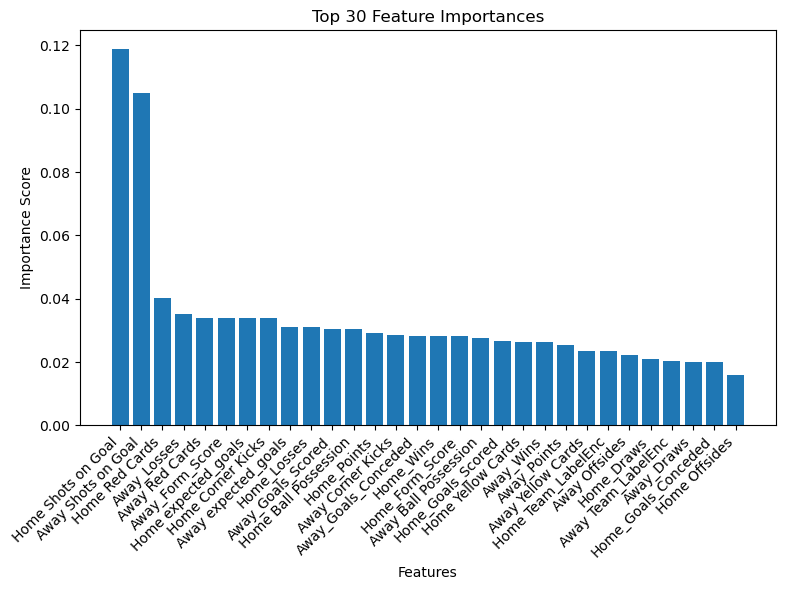

1. Home Shots on Goal: 0.11883231997489929
2. Away Shots on Goal: 0.10500486195087433
3. Home Red Cards: 0.04031984135508537
4. Away_Losses: 0.03527011722326279
5. Away Red Cards: 0.033992670476436615
6. Away_Form_Score: 0.033937711268663406
7. Home expected_goals: 0.03391854092478752
8. Home Corner Kicks: 0.03389035537838936
9. Away expected_goals: 0.0311500933021307
10. Home_Losses: 0.031097164377570152
11. Away_Goals_Scored: 0.03049798123538494
12. Home Ball Possession: 0.03049401193857193
13. Home_Points: 0.02929820865392685
14. Away Corner Kicks: 0.028505461290478706
15. Away_Goals_Conceded: 0.028361989185214043
16. Home_Wins: 0.028138363733887672
17. Home_Form_Score: 0.028085973113775253
18. Away Ball Possession: 0.027751831337809563
19. Home_Goals_Scored: 0.026679672300815582
20. Home Yellow Cards: 0.026345640420913696
21. Away_Wins: 0.026294196024537086
22. Away_Points: 0.025491690263152122
23. Away Yellow Cards: 0.02364479936659336
24. Home Team_LabelEnc: 0.023504815995693207


In [ ]:
feature_names = X_train.columns.tolist()  # or however you track feature names
show_feature_importances(model_xgb, feature_names, top_n=30)